In [1]:
import numpy as np
import matplotlib.pyplot as plt
import module.banque_ecoulements as bq

In [2]:
grid = bq.create_2Dgrid_cyl()

In [3]:
Vinf = 2.0
L = 5.0
d0 = 0.2
unif = bq.uniform(grid,Vinf)
source = bq.source(grid,L,center=[-d0,0.])
puits = bq.source(grid,-L,center=[d0,0.])
ecoul = bq.superpose_ecoulement(unif,source,grid)
ecoul = bq.superpose_ecoulement(ecoul,puits,grid)
V = (ecoul['u']**2 + ecoul['v']**2)**0.5
Cp = 1 - (V/Vinf)**2

(-2.0, 2.0)

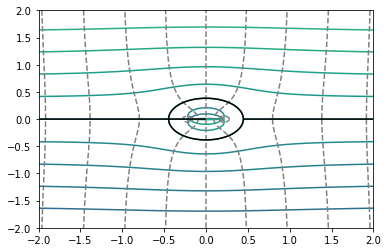

In [4]:
plt.contour(grid['x'],grid['y'],ecoul['psi'],30)
plt.contour(grid['x'],grid['y'],ecoul['phi'],25,linestyles='--',colors='grey')
plt.contour(grid['x'],grid['y'],ecoul['psi'],[0.,],colors='black')
plt.xlim(-2,2)
plt.ylim(-2,2)

In [5]:
Vinf = 2.0
R0 = 0.5
K = 2*np.pi*Vinf*R0**2
grid = bq.create_2Dgrid_cyl(rbounds=[R0-1.0e-5,10*R0])
unif = bq.uniform(grid,Vinf)
dipole = bq.dipole(grid,K)
ecoul = bq.superpose_ecoulement(unif,dipole,grid)
V = (ecoul['u']**2 + ecoul['v']**2)**0.5
Cp = 1 - (V/Vinf)**2

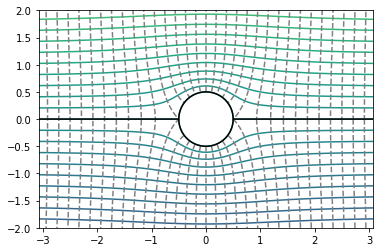

In [6]:
plt.contour(grid['x'],grid['y'],ecoul['psi'],50)
plt.contour(grid['x'],grid['y'],ecoul['phi'],50,linestyles='--',colors='grey')
plt.contour(grid['x'],grid['y'],ecoul['psi'],[0.,],colors='black')
plt.axis('equal')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

In [46]:
Vinf = 2.0
R0 = 0.5
K = 2*np.pi*Vinf*R0**2
G = 0.0 * (4.0*np.pi*Vinf*R0)

In [47]:
grid = bq.create_2Dgrid_cyl(rbounds=[R0-1.0e-5,10*R0])
unif = bq.uniform(grid,Vinf)
dipole = bq.dipole(grid,K)
tourb = bq.tourbillon(grid,G,R0=R0)
ecoul = bq.superpose_ecoulement(unif,dipole,grid)
ecoul = bq.superpose_ecoulement(ecoul,tourb,grid)
V = (ecoul['ur']**2 + ecoul['ut']**2)**0.5
Cp = 1 - (V/Vinf)**2

In [48]:
circle = dict()
t = np.linspace(-np.pi,np.pi,1000)
dtheta = t[1]-t[0]
circle['x'] = R0*np.cos(t)
circle['y'] = R0*np.sin(t)
circle_unif = bq.uniform(circle,Vinf)
circle_dipole = bq.dipole(circle,K)
circle_tourb = bq.tourbillon(circle,G,R0=R0)
circle_ecoul = bq.superpose_ecoulement(circle_unif,circle_dipole,circle)
circle_ecoul = bq.superpose_ecoulement(circle_ecoul,circle_tourb,circle)
circle_V = (circle_ecoul['ur']**2 + circle_ecoul['ut']**2)**0.5
circle_Cp = 1 - (circle_V/Vinf)**2
CL = -0.5*np.trapz(circle_Cp*np.sin(t)*dtheta)
CD = -0.5*np.trapz(circle_Cp*np.cos(t)*dtheta)
print('Coeff portance:',CL)
print('Coeff trainee:',CD)

Coeff portance: -0.0
Coeff trainee: -4.163336342344337e-16


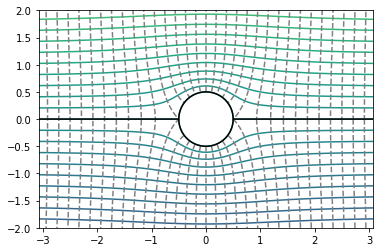

In [49]:
plt.contour(grid['x'],grid['y'],ecoul['psi'],50)
plt.contour(grid['x'],grid['y'],ecoul['phi'],50,linestyles='--',colors='grey')
plt.contour(grid['x'],grid['y'],ecoul['psi'],[0.,],colors='black')
plt.axis('equal')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

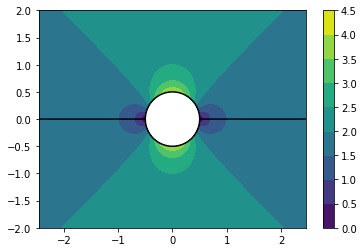

In [50]:
plt.contourf(grid['x'],grid['y'],V)
plt.colorbar()
plt.contour(grid['x'],grid['y'],ecoul['psi'],[0.,],colors='black')
plt.axis('equal')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

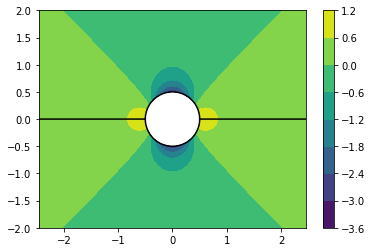

In [52]:
plt.contourf(grid['x'],grid['y'],Cp)
plt.colorbar()
plt.contour(grid['x'],grid['y'],ecoul['psi'],[0.,],colors='black')
plt.axis('equal')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

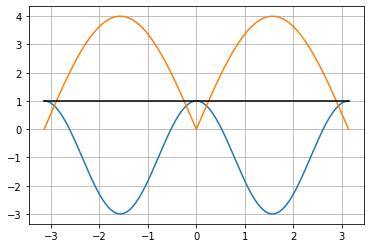

In [53]:
plt.plot(t,circle_Cp)
plt.plot(t,circle_V)
plt.plot(t,np.ones_like(t),color='black')
plt.grid()